## 시험에 나옴
- 음/양의 상관관계 시험에 나옴

### 새로운 모델

- 도미와 빙어를 구분하는 머신러닝 모델을 성공적으로 개발한 후 자신감이 생겼음
- 새로운 요구사항이 들어옴.

>현재 상황 : 여름 농어철로 농어 주문이 크게 늘어나, 마켓은 업계 최초로 농어를 무게 단위로 판매하고자함
>    - 농어를 마리당 가격으로 판매했더니 볼품없는 농어를 받는 고객이 항의.

>요구 사항 : 농어의 길이를 가지고 무게를 예측하는 모델을 개발하세요.

회귀 모델 : 

- 지도 학습 : 정답 데이터 필수
- but 회귀모델은 적정한 수치값을 예측 : 길이를 재면 무게를 예측
    - 분류모델은 카테고리가 나눠져 있음
- 회귀 : 평균값에 회귀하려고 하는 경향 활용
    - 선형 회귀 분석 : 차원공간 안 데이터들과의 오차가 가장 적은 직선(회귀선)을 찾음. 그 선이 예측 함수가 됨.

###  K-NN 회귀

-  K개의 이웃의 수치데이터를 바탕으로 '평균'을 내어 예측하는 방법

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1 Data Load

- 농어(perch)의 길이와 무게 데이터 불러옴.

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
print(type(perch_length))
print(len(perch_length))

<class 'numpy.ndarray'>
56


> 농어 56마리의 데이터이며, 클래스가 넘파이 배열임을 알 수 있음.

- 농어의 길이, 무게 분포를 그래프로 표현

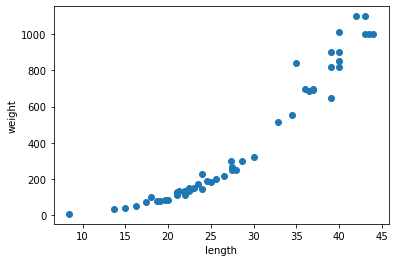

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> 양의 상관관계 : 상관관계 값이 1에 가까움 (-1에 가까울수록 음의 상관관계)

### 2 Train/Test split

- train_test_split() : 데이터를 트레인 데이터와 테스트 데이터로 분할
    - 디폴트 : 7.5:2.5

In [5]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
print(train_input.shape, test_input.shape)

(42,) (14,)


### 3. Data Preprocess(데이터 전처리)

- scikit-learn 모듈 : 머신러닝 모델 사용
    - 모델 입력 데이터를 2차원 배열값으로 입력해야 함.
        - 1차원 배열  [1, 2, 3, 4, 5]
        - 2원 배열    [[1],[2], [3], [4], [5]]

In [7]:
print(perch_length.shape)

(56,)


> 농어 데이터는 1차원 배열임. scikit-learn모듈에 사용하려면 2차원으로 바꿔야함.

- np.reshape() : np 배열의 shape를 변형
    - 인수에 -1사용시 무시하고 그 다음에 있는 인수를 리셰이프.

In [8]:
test_array=np.array([1,2,3,4])
test_array=test_array.reshape(2,2)
test_array

array([[1, 2],
       [3, 4]])

In [9]:
print(train_input[:5])

[19.6 22.  18.7 17.4 36. ]


In [10]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [11]:
print(train_input[:5])

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]


> 2차원 배열로 됨.

### 4. 모델 학습

In [12]:
from sklearn.neighbors import KNeighborsRegressor

- k-nn회귀 모델 생성/학습

In [13]:
knr=KNeighborsRegressor()

In [14]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

- 모델 평가
    - 회귀 평가 : 정답이 없어서 정학도로 평가하지 않음.
    - 결정 계수($r^2$) 사용
    - MAE(mean absolute erroe) 사용

In [15]:
knr.score(test_input, test_target)

0.992809406101064

### 5. 결정계수

- 상관계수 ($r$)
    - 두 양적 변수간 회귀관계 측정
    - 상관관계 정도를 나타냄
    - -1~1사이의 값.


- 결정계수 ($r^2$)
    - 회귀선이 각각의 값들과 얼마나 가까운지를 측정
    - 회귀선이 얼마나 실제 값을 잘 예측할 수 있는지를 말해줌
    - 0~1 상이의 값
    - r^2의 값이 1에 가까워질수록 정확도 증가.
    
> $R^2 = 1 -(타킷-예측)^2의 합/ (타킷-평균)^2의 합$

In [18]:
knr.score(test_input, test_target)

0.992809406101064

> 결정계수가 1에 가까움

### 6. MAE(Mean Absolute Error) (중요)

- 타킷과 예측의 오차의 절대값을 평균해서 반환

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


> 농어 길이를 넣었을 때 예측한 무게가 19kg 정도 오차가 있음

### 7. 과대적합(Over fitting) vs 과소적합(Under fitting)

## 시험에 나옴

- 과대적합 : Train 성능 좋은데 Test 성능이 좋지 않음.
    - 훈련세트에서만 잘 동작
- 과소적합 : Train보다 Test성능이 더 좋거나, 둘다 좋지 않음.
    - 과소적합이 나타나는 이유 : 트레인, 테스트 데이터 세트 크기가 매우 작거나, 테스트 데이터가 트레인의 특징을 다 담지 못하는 경우.


- Train 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요
- 일반화된 모델을 만드는 것이 중요
>- 예시) 요양병원 환자 데이터로 한국의 주요 질병을 예측하는 모델을 만들 때.
>    - 고령의 환자에게만 잘 맞는 일반화되지 않은 모델이 생성됨


- 가장 좋은 모델은 트레인 데이터를 사용한 평과 결과가 조금 더 높게 나오는 것이 좋음.
    - 트레인으로 학습했기 때문에 트레인 데이터에서 조금 더 높은 성능을 보이기 때문.

In [20]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [21]:
print(knr.score(test_input, test_target))

0.992809406101064


> 테스트 성능이 더 좋은 과소적합

#### 현재 우리 모델은 과소적합.
- 과소적합을 해결하기 위해서는 훈련 데이터에 맞게 모델을 조금 더 복잡하게 만들어야 함
    - k-nn은 k의 크기를 줄이면 모델이 더 복잡해짐
        - k를 줄이면 국지적인 패턴에 민감해짐
        - k를 늘리면 데이터 전반에 있는 일반적인 패턴을 따름

In [26]:
knr.n_neighbors= 3 # k값 감소
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [27]:
print(knr.score(test_input, test_target))

0.9746459963987609


> 트레인 성능이 약간 더 좋은 좋은 모델